### 손님의 성별, 수, 전체 먹은 금액 등으로 내가 받을 팁을 예측할 수 있을까?

In [1]:
from IPython.display import display, Image
print("슝=3")

슝=3


In [2]:
import seaborn as sns
#- ! bs4 모듈이 설치되어 있어야 합니다. -#

sns.get_dataset_names()

/Users/Jinmi/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /Users/Jinmi/opt/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
tips = sns.load_dataset("tips")
print(tips.shape)
tips.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
import pandas as pd
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


In [9]:
# tips 의 tip을 제일 마지막 컬럼으로 보내주기(순서바꾸기)

tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
tips.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner,tip
0,16.99,2,0,1,0,1,0,0,0,1,0,1,1.01
1,10.34,3,1,0,0,1,0,0,0,1,0,1,1.66
2,21.01,3,1,0,0,1,0,0,0,1,0,1,3.50
3,23.68,2,1,0,0,1,0,0,0,1,0,1,3.31
4,24.59,4,0,1,0,1,0,0,0,1,0,1,3.61


#### x 를 12개의 vector인 X로 만들기

In [20]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

슝=3


#### train, test set 만들기

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(195, 12) (195,)
(49, 12) (49,)


#### 변수 w, b를 준비하기.
- w는 x의 개수에 맞춰 12개가 들어가는 벡터 W로 묶어놓으면 됨

In [29]:
import numpy as np
W = np.random.rand(12)
b = np.random.rand()
print("슝=3")

슝=3


In [30]:
W

array([0.33027876, 0.55316087, 0.92393447, 0.03207217, 0.54547996,
       0.25341339, 0.3149588 , 0.69991937, 0.07049875, 0.5181169 ,
       0.20321045, 0.41522923])

In [36]:
b

0.5040648440795886

#### 12개의 변수가 들어가는 모델 만들기

In [58]:
# DJ's test version
def test_model(X, W, b):
    y = X * W + b
    return y

In [51]:
new = X * W
X[0]

array([16.99,  2.  ,  0.  ,  1.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,
        1.  ,  0.  ,  1.  ])

In [52]:
W

array([0.33027876, 0.55316087, 0.92393447, 0.03207217, 0.54547996,
       0.25341339, 0.3149588 , 0.69991937, 0.07049875, 0.5181169 ,
       0.20321045, 0.41522923])

In [53]:
new[0]

array([5.61143617, 1.10632173, 0.        , 0.03207217, 0.        ,
       0.25341339, 0.        , 0.        , 0.        , 0.5181169 ,
       0.        , 0.41522923])

In [54]:
new[0] == X[0]*W

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [55]:
new[-1]== X[-1]*W

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [56]:
new[-2] == X[-2]*W

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [59]:
def model(X, W, b):
    predictions = 0
    for i in range(12):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions
print("슝=3")

슝=3


In [60]:
X[:,0]

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
       18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
       26.86, 25.28, 14.73, 10.51, 17.92, 27.2 , 22.76, 17.29, 19.44,
       16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16,
       28.97, 22.49,  5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01,
       12.46, 11.35, 15.38, 44.3 , 22.42, 20.92, 15.36, 20.49, 25.21,
       18.24, 14.31, 14.  ,  7.25, 38.07, 23.95, 25.71, 17.31, 29.93,
       10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8 ,
        8.52, 14.52,

In [61]:
W[0]

0.330278762293885

In [62]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse
print("슝=3")

슝=3


In [63]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L
print("슝=3")

슝=3


In [64]:
def gradient(X, W, b, y):
    # N은 가중치의 개수
    N = len(W)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db
print("슝=3")

슝=3


In [65]:
dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [6589.06770085  806.33506011  201.56703988   87.57154     116.35810042
  172.78047945   64.55943425   20.96707483  103.99097866   99.62109214
   69.76126275  219.37731713]
db: 14.219930157906715


In [68]:
len(dW)

12

In [70]:
# 학습률 설정

LEARNING_RATE = 0.0001

In [71]:
# 학습시키기

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, W, b, y)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 1.7810
Iteration 20 : Loss 1.7420
Iteration 30 : Loss 1.7134
Iteration 40 : Loss 1.6864
Iteration 50 : Loss 1.6607
Iteration 60 : Loss 1.6362
Iteration 70 : Loss 1.6130
Iteration 80 : Loss 1.5909
Iteration 90 : Loss 1.5698
Iteration 100 : Loss 1.5498
Iteration 110 : Loss 1.5307
Iteration 120 : Loss 1.5125
Iteration 130 : Loss 1.4952
Iteration 140 : Loss 1.4786
Iteration 150 : Loss 1.4628
Iteration 160 : Loss 1.4478
Iteration 170 : Loss 1.4334
Iteration 180 : Loss 1.4196
Iteration 190 : Loss 1.4065
Iteration 200 : Loss 1.3939
Iteration 210 : Loss 1.3819
Iteration 220 : Loss 1.3704
Iteration 230 : Loss 1.3594
Iteration 240 : Loss 1.3488
Iteration 250 : Loss 1.3387
Iteration 260 : Loss 1.3290
Iteration 270 : Loss 1.3197
Iteration 280 : Loss 1.3107
Iteration 290 : Loss 1.3022
Iteration 300 : Loss 1.2939
Iteration 310 : Loss 1.2860
Iteration 320 : Loss 1.2784
Iteration 330 : Loss 1.2711
Iteration 340 : Loss 1.2641
Iteration 350 : Loss 1.2573
Iteration 360 : Loss 1.2508
I

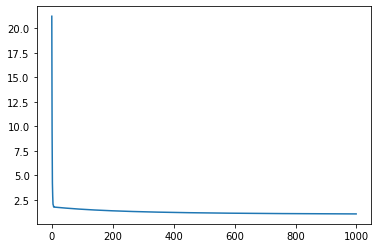

In [74]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [75]:
W, b

(array([0.08180959, 0.09388933, 0.36913301, 0.14183092, 0.16700219,
        0.18684844, 0.24907559, 0.54867814, 0.03392777, 0.3267696 ,
        0.0668025 , 0.10659445]), 0.47667759965340467)

In [77]:
# test 데이터로 loss값 구하기

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

0.6966568876932737

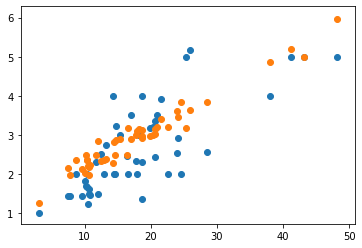

In [79]:
# x축에는 total_bill, y 축에는 tip과 prediction

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

### 8-6. 지금까지 한 모든 과정을, 라이브러리로 깔끔하게

In [80]:
tips = sns.load_dataset("tips")
tips = pd.get_dummies(tips, columns=['sex', 'smoker', 'day', 'time'])
tips = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
             'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner', 'tip']]
print("슝=3")

슝=3


In [81]:
X = tips[['total_bill', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes', 'smoker_No',
          'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch', 'time_Dinner']].values
y = tips['tip'].values
print("슝=3")

슝=3


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("슝=3")

슝=3


In [83]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
print("슝=3")

슝=3


In [85]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
preds = lm.predict(X_test)
preds

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [88]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, preds)
mse

0.7033566017436097

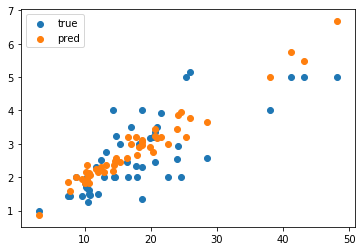

In [90]:
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], preds, label="pred")
plt.legend()
plt.show()